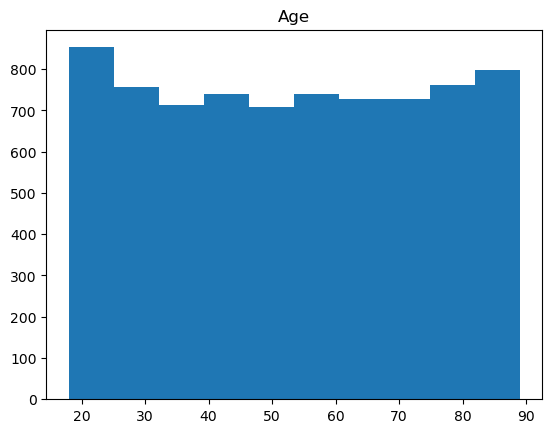

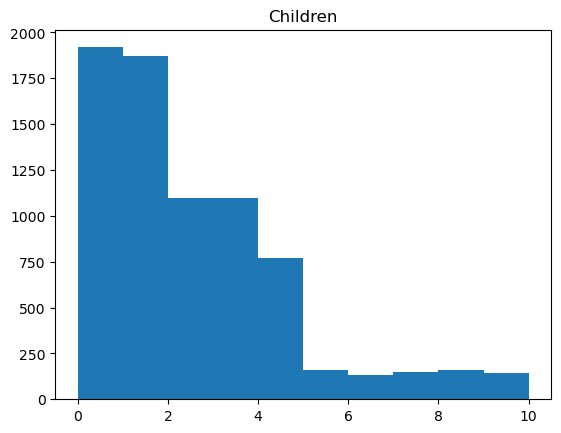

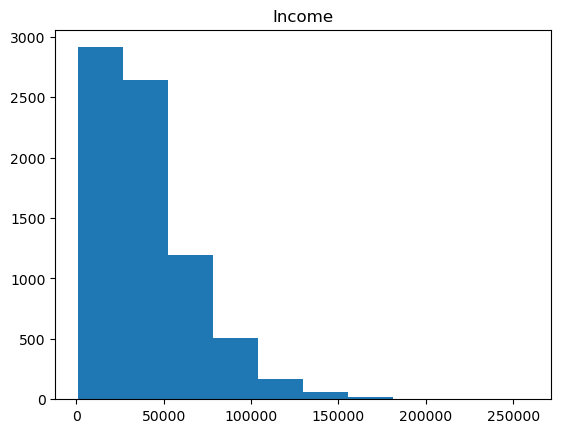

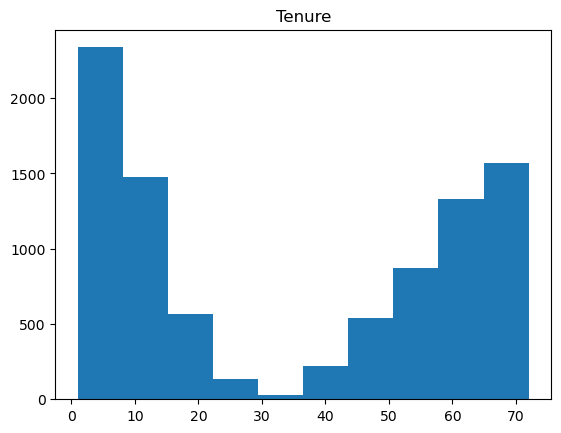

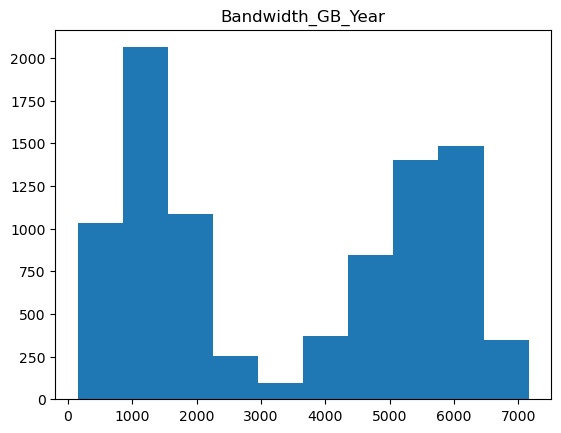

Unnamed: 0              0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

In [21]:
#MissingDATA
import pandas as pd
from pandas import DataFrame
import seaborn
import numpy as np
import matplotlib.pyplot as plt

# Load the data into a DataFrame
data = pd.read_csv('churn_raw_data.csv')

#Examine the Missing Data 
plt.hist(data['Age'])
plt.title('Age')
plt.show()

plt.hist(data['Children'])
plt.title('Children')
plt.show()

plt.hist(data['Income'])
plt.title('Income')
plt.show()

plt.hist(data['Tenure'])
plt.title('Tenure')
plt.show()

plt.hist(data['Bandwidth_GB_Year'])
plt.title('Bandwidth_GB_Year')
plt.show()

#Performing Imputation
data['Age'].fillna(data['Age'].mean(), inplace = True)
data['Children'].fillna(data['Children'].median(), inplace = True)
data['Income'].fillna(data['Income'].median(), inplace = True)
data['Tenure'].fillna(data['Tenure'].median(), inplace = True)
data['Bandwidth_GB_Year'].fillna(data['Bandwidth_GB_Year'].median(), inplace = True)
data['Techie']= data['Techie'].fillna(data['Techie'].mode()[0])
data['InternetService']= data['InternetService'].fillna(data['InternetService'].mode()[0])
data['Phone']= data['Phone'].fillna(data['Phone'].mode()[0])
data['TechSupport']= data['TechSupport'].fillna(data['TechSupport'].mode()[0])



#Verificaton
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 858 entries, 12 to 9987
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            858 non-null    int64  
 1   CaseOrder             858 non-null    int64  
 2   Customer_id           858 non-null    object 
 3   Interaction           858 non-null    object 
 4   City                  858 non-null    object 
 5   State                 858 non-null    object 
 6   County                858 non-null    object 
 7   Zip                   858 non-null    int64  
 8   Lat                   858 non-null    float64
 9   Lng                   858 non-null    float64
 10  Population            858 non-null    int64  
 11  Area                  858 non-null    object 
 12  Timezone              858 non-null    object 
 13  Job                   858 non-null    object 
 14  Children              641 non-null    float64
 15  Age                   646 

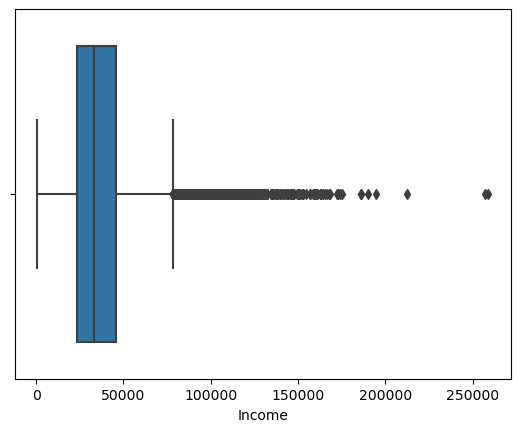

In [88]:
#Outliers for Income
import pandas as pd
from pandas import DataFrame
import seaborn
import numpy as np
import matplotlib.pyplot as plt

# Load the data into a DataFrame
data = pd.read_csv('churn_raw_data.csv')
#Performing Imputation
data['Income'].fillna(data['Income'].median(), inplace = True)
#Examine Outliers
boxplot = seaborn.boxplot(x='Income',data=data)

#Count outliers
income_query= data.query('Income >75000')

#I will not Replace outliers due to the amount
income_query.info()



<class 'pandas.core.frame.DataFrame'>
Index: 451 entries, 10 to 9982
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            451 non-null    int64  
 1   CaseOrder             451 non-null    int64  
 2   Customer_id           451 non-null    object 
 3   Interaction           451 non-null    object 
 4   City                  451 non-null    object 
 5   State                 451 non-null    object 
 6   County                451 non-null    object 
 7   Zip                   451 non-null    int64  
 8   Lat                   451 non-null    float64
 9   Lng                   451 non-null    float64
 10  Population            451 non-null    int64  
 11  Area                  451 non-null    object 
 12  Timezone              451 non-null    object 
 13  Job                   451 non-null    object 
 14  Children              451 non-null    float64
 15  Age                   333 

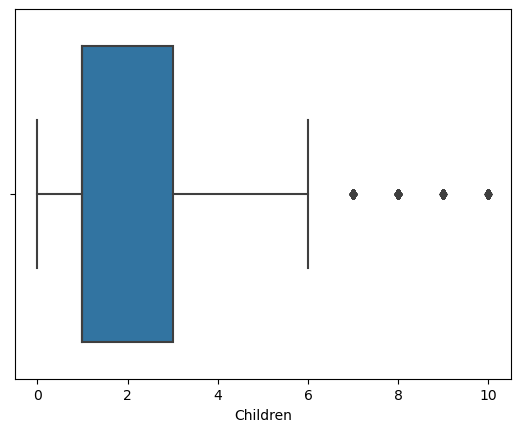

In [73]:
#Outliers for Children
import pandas as pd
from pandas import DataFrame
import seaborn
import numpy as np
import matplotlib.pyplot as plt

# Load the data into a DataFrame
data = pd.read_csv('churn_raw_data.csv')
#Performing Imputation
data['Children'].fillna(data['Children'].median(), inplace = True)
#Examine Outliers
boxplot = seaborn.boxplot(x='Children',data=data)


#Count outliers
children_query= data.query('Children > 6 ')

children_query.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9142 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9142 non-null   int64  
 1   CaseOrder             9142 non-null   int64  
 2   Customer_id           9142 non-null   object 
 3   Interaction           9142 non-null   object 
 4   City                  9142 non-null   object 
 5   State                 9142 non-null   object 
 6   County                9142 non-null   object 
 7   Zip                   9142 non-null   int64  
 8   Lat                   9142 non-null   float64
 9   Lng                   9142 non-null   float64
 10  Population            9142 non-null   int64  
 11  Area                  9142 non-null   object 
 12  Timezone              9142 non-null   object 
 13  Job                   9142 non-null   object 
 14  Children              6864 non-null   float64
 15  Age                   6879

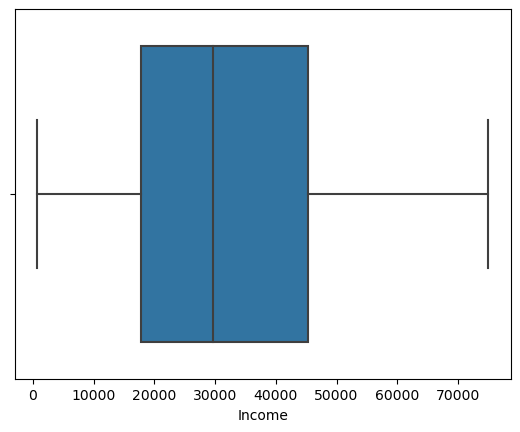

In [78]:
#Removing Outliers for Income
import pandas as pd
from pandas import DataFrame
import seaborn
import numpy as np
import matplotlib.pyplot as plt

# Load the data into a DataFrame
data = pd.read_csv('churn_raw_data.csv')

#Remove outliers
outliers =data[(data['Income'] >75000)]
#Drop outliers
data.drop(data[(data['Income']>75000)].index, inplace=True)
#Replace outliers
#data['Income'] = np.where(data['Income'] >110000, np.nan, data['Income'])
#data['Income'].fillna(data['Income'].median(), inplace =True)
#income_query.info()
boxplot = seaborn.boxplot(x='Income',data=data)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  float64
 15  Age                 

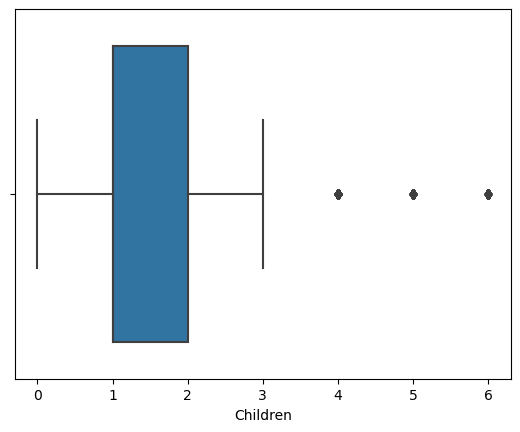

In [76]:
#Imputing Outliers for Children 
import pandas as pd
from pandas import DataFrame
import seaborn
import numpy as np
import matplotlib.pyplot as plt

# Load the data into a DataFrame
data = pd.read_csv('churn_raw_data.csv')


#Replace outliers
data['Children'] = np.where(data['Children'] > 6, np.nan, data['Children'])
data['Children'].fillna(data['Children'].median(), inplace =True)
#income_query.info()
boxplot = seaborn.boxplot(x='Children',data=data)
data.info()


In [87]:
#Ordinal Encoding 
import pandas as pd

data = pd.read_csv('churn_raw_data.csv')

mapping = {'yes': 1, 'no': 0}
columns_to_convert = ['Churn','Techie','Port_modem','Tablet','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

for column in columns_to_convert:
    data[column] = data[column].apply(lambda x: 1 if x == 'yes' else 0)
print(data)
    #data[['PaperlessBilling']]

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9996       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9997       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9998       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9999       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999       10000      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

              City State   